## Analytics in terms of B-index

### 1. "Lite breakfast" SB combination set 

In [18]:
# required imports
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
# list with 24 combinations of 3 items, they specified in same order 
# as B_index cols in df below --> 1-st col 'SB_solid_b_0' and so on

combi_list = []

with open ('SB_lite_b_8.txt', 'r') as f:
    for line in f:
        line = line[:-1]
        combi_list.append (line)
    f.close()

In [20]:
SB_lite_b_8 = pd.read_csv ('SB_lite_b_8.csv',  skiprows=1, names=combi_list , sep=(','))
SB_lite_b_8.head()

,"('Soups', 'Cold Drinks')","('Soups', 'Hot Drinks')","('Salads', 'Cold Drinks')","('Salads', 'Hot Drinks')","('Protein Boxes & Bowls', 'Cold Drinks')","('Protein Boxes & Bowls', 'Hot Drinks')","('Hot Breakfast', 'Cold Drinks')","('Hot Breakfast', 'Hot Drinks')"
0,14.467253,15.761714,1.817249,1.991554,1.493121,1.721356,2.510340,2.69701
1,13.566538,15.761714,1.638452,1.991554,1.339067,1.721356,1.828098,2.69701
2,1.886455,15.761714,0.983760,1.991554,0.834038,1.721356,0.937616,2.69701
3,13.716896,15.761714,1.680605,1.991554,1.389062,1.721356,1.872029,2.69701
4,23.929132,15.761714,1.659544,1.991554,1.305413,1.721356,2.344704,2.69701


In [21]:
# cols of different length!
SB_lite_b_8.describe()

,"('Soups', 'Cold Drinks')","('Soups', 'Hot Drinks')","('Salads', 'Cold Drinks')","('Salads', 'Hot Drinks')","('Protein Boxes & Bowls', 'Cold Drinks')","('Protein Boxes & Bowls', 'Hot Drinks')","('Hot Breakfast', 'Cold Drinks')","('Hot Breakfast', 'Hot Drinks')"
count,126.000000,36.000000,126.000000,90.000000,126.000000,90.000000,126.000000,126.000000
mean,8.041135,6.216398,2.589125,1.941029,1.296113,1.299669,3.007376,2.179563
std,6.455090,5.497816,1.446653,1.440988,0.192329,0.582993,1.260691,1.057278
min,1.358477,1.742856,0.955667,0.653660,0.801780,0.798789,0.915641,0.669651
25%,3.038797,2.324340,1.597964,1.037937,1.204404,1.014058,2.271869,1.426209
50%,4.384307,3.311783,1.816681,1.459860,1.301373,1.195244,2.450188,2.075111
75%,13.241568,13.768750,4.209507,2.032132,1.411993,1.480945,4.761907,2.530727
max,24.667729,15.761714,7.292251,6.422251,1.732655,5.796912,5.314884,5.140884


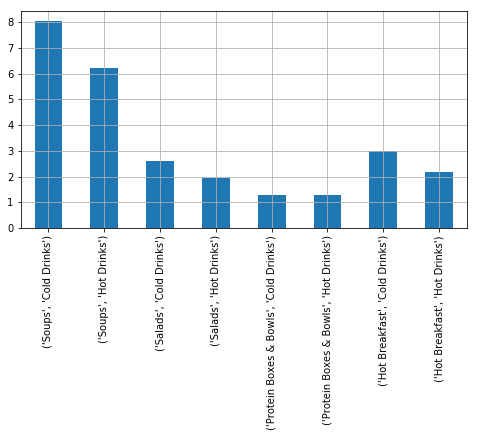

In [22]:
# B_index mean values for all groups
cols = pd.Index.to_list(SB_lite_b_8.columns[0:])
SB_lite_b_8[cols].mean().plot(kind = 'bar', subplots = False, width = 0.5, figsize = (8,4), grid = True)

In [24]:
# in this set we delete only first item with poor (for dinner) calories and nutrition: 
# mean > 2.5. Rest of items could be used as lite dinner in different cases

# above cutoff:
above_cut = (SB_lite_b_8.mean() > 2.5)
above_drop_list = [col for col in above_cut]
a = above_cut.loc[above_drop_list]
above_drop = pd.Index.to_list(a.index)

# deleting columns:
SB_lite_b_8.drop (columns = above_drop, inplace=True)
SB_lite_b_best = SB_lite_b_8
SB_lite_b_best.describe()

,"('Salads', 'Hot Drinks')","('Protein Boxes & Bowls', 'Cold Drinks')","('Protein Boxes & Bowls', 'Hot Drinks')","('Hot Breakfast', 'Hot Drinks')"
count,90.000000,126.000000,90.000000,126.000000
mean,1.941029,1.296113,1.299669,2.179563
std,1.440988,0.192329,0.582993,1.057278
min,0.653660,0.801780,0.798789,0.669651
25%,1.037937,1.204404,1.014058,1.426209
50%,1.459860,1.301373,1.195244,2.075111
75%,2.032132,1.411993,1.480945,2.530727
max,6.422251,1.732655,5.796912,5.140884


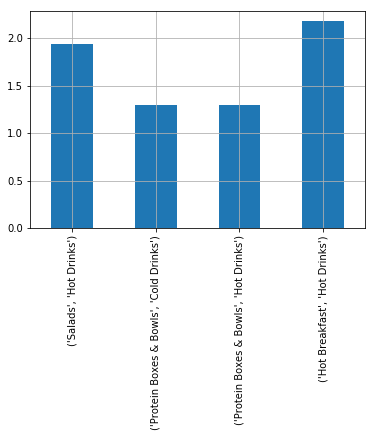

In [25]:
# vizualizing filtered df:
cols = pd.Index.to_list(SB_lite_b_best.columns[0:])
SB_lite_b_best[cols].mean().plot(kind = 'bar', subplots = False, width = 0.5, figsize = (6,4), grid = True)

In [26]:
SB_lite_b_best.to_csv ('SB_lite_b_best.csv')